**Intro**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

**Data Cleaning/ Preprocess the Data**

In [2]:
#Read data and remove non-US cities
df = pd.read_csv("/kaggle/input/historical-hourly-weather-data/temperature.csv", delimiter = ",")
df = df.drop('Vancouver', axis=1)
df = df.drop('Toronto', axis=1)
df = df.drop('Beersheba', axis=1)
df = df.drop('Montreal', axis=1)
df = df.drop('Tel Aviv District', axis=1)
df = df.drop('Eilat', axis=1)
df = df.drop('Haifa', axis=1)
df = df.drop('Nahariyya', axis=1)
df = df.drop('Jerusalem', axis=1)

df.head(3)

,datetime,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,283.850000,294.030000,284.030000,298.17000,288.650000,299.720000,281.000000,285.630000,288.220000,287.170000
2,2012-10-01 14:00:00,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,283.889394,294.035341,284.069789,298.20523,288.650172,299.732518,281.024767,285.663208,288.247676,287.186092


In [3]:
df.describe()

,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
count,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,45252.000000,...,45246.000000,45247.000000,45252.000000,45252.000000,45250.000000,44448.000000,45250.000000,45250.000000,44460.000000,45250.000000
mean,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,293.785646,...,284.771904,289.772673,282.971668,294.333380,288.897483,298.181274,284.053939,285.374168,285.400406,283.779823
std,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,8.303688,...,11.043634,8.703643,11.034481,6.682162,9.133072,4.190185,10.453927,10.242377,10.220932,9.802499
min,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,265.050000,...,244.866333,259.500000,243.483333,268.610000,255.658333,275.233333,249.422667,250.390000,250.774000,249.540000
25%,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,288.600000,...,276.110000,283.320417,274.690000,290.040875,282.010000,296.030000,275.857427,277.350636,277.370000,276.090000
50%,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,295.184250,...,285.929333,291.050000,283.540000,295.640000,290.120000,298.880000,285.220000,285.927583,285.870000,284.133250
75%,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,299.490000,...,293.960000,296.290000,292.231250,299.140000,295.770000,300.992375,292.580000,293.796000,293.760000,291.620000
max,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,313.660000,...,312.040000,310.760000,308.050000,310.150000,310.900000,308.680000,306.290000,308.000000,310.240000,308.000000


In [4]:
#Take all hourly US city temperatures and condense into a single hourly US average temperature column
df['USAvgTemp'] = df[['Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Philadelphia', 'New York', 'Boston']].mean(axis=1)
df = df.loc[:,[ 'datetime','USAvgTemp']]
df.head(3)

,datetime,USAvgTemp
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,288.471111
2,2012-10-01 14:00:00,288.487097


In [5]:
#Convert from hourly measurements to daily averages
df['DATE'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
davg_df = df.groupby(pd.Grouper(freq='D', key='DATE')).mean()

# monthly
#davg_df2 = df.groupby(pd.Grouper(freq='M', key='DATE')).mean()

davg_df.head(3)

,USAvgTemp
DATE,
2012-10-01,288.646997
2012-10-02,291.376971
2012-10-03,292.790571


In [6]:
#Remove nulls
davg_df[davg_df.isnull()]

#monthly
#davg_df2[davg_df2.isnull()]

,USAvgTemp
DATE,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2017-11-26,NaN
2017-11-27,NaN
2017-11-28,NaN


In [7]:
davg_df['Points'] = range(0,len(davg_df.index.values))

#monthly
#davg_df2['Points'] = range(0,len(davg_df2.index.values))

In [8]:
#Convert from kelvin to Fahrenheit
davg_df['USAvgTemp'] = (davg_df['USAvgTemp'] - 273.15) * 9/5 + 32

#monthly
#davg_df2['USAvgTemp'] = (davg_df2['USAvgTemp'] - 273.15) * 9/5 + 32

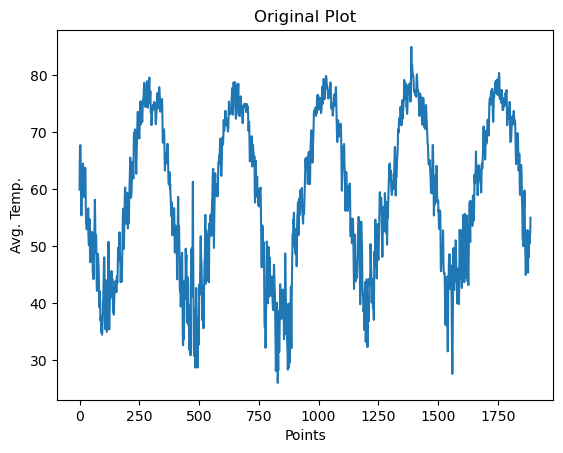

In [9]:
#Plot the original figure with US average temperatures in Fahrenheit over number of data points
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Points')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Points', 'USAvgTemp', data = davg_df);

**adfuller import** to perform Augmented Dickey-Fuller Test to determine if time series data is **stationary**


In [10]:
from statsmodels.tsa.stattools import adfuller

def stationary_ts_check(ts):
    #Compute moving average
    mov_avg = ts.rolling(window=325).mean()
    
    #plot original and moving average/rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(ts, color='orange', label='Original data')
    plt.plot(mov_avg, color='blue', label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Average Temperature (F)')
    plt.title('Original Time Series and Moving Average')
    plt.legend()
    plt.show()
    
    #Augmented Dickey-Fuller test
    print('Augmented Dickey-Fuller test:')
    adf_output = adfuller(ts)
    df_result = pd.Series(adf_output[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_output[4].items():
        df_result['Critical Value (%s)' % key] = value
    print(df_result)


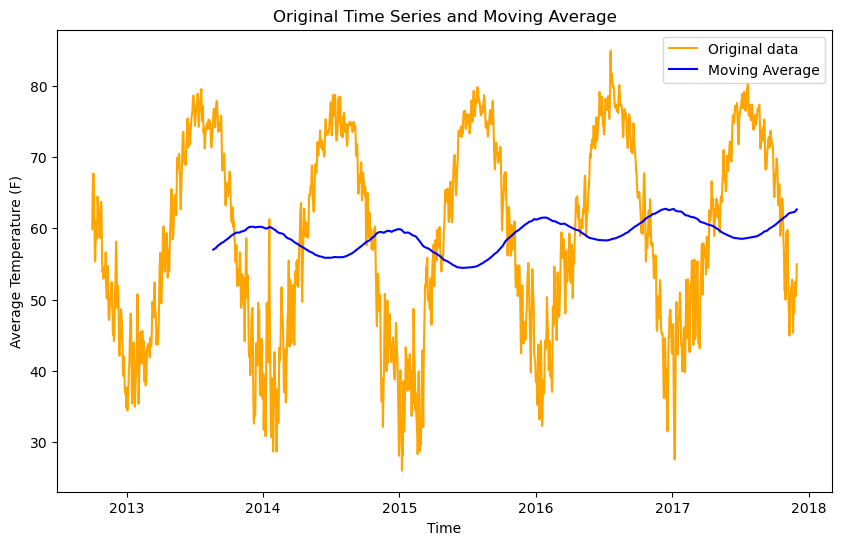

Augmented Dickey-Fuller test:
Test Statistic                   -2.438240
p-value                           0.131233
#Lags Used                       22.000000
Number of Observations Used    1864.000000
Critical Value (1%)              -3.433863
Critical Value (5%)              -2.863092
Critical Value (10%)             -2.567596
dtype: float64


In [11]:
stationary_ts_check(davg_df.USAvgTemp)

**Original Data** - unmodified time series dataset

**Rolling Mean** - Moving Average window calculated per 325 data points

**Visual check**- rolling mean appears to have no significant trends/patterns - likely stationary

**Augmented Dickey-Fuller test-** null hypothesis is rejected if p-value <5% - p value is 0.02, much smaller than 5% - null hypothesis rejected

In [12]:
davg_df.USAvgTemp.rolling(center=False,window=325).mean()

DATE
2012-10-01          NaN
2012-10-02          NaN
2012-10-03          NaN
2012-10-04          NaN
2012-10-05          NaN
                ...    
2017-11-26    62.396970
2017-11-27    62.460140
2017-11-28    62.535494
2017-11-29    62.604968
2017-11-30    62.661905
Freq: D, Name: USAvgTemp, Length: 1887, dtype: float64

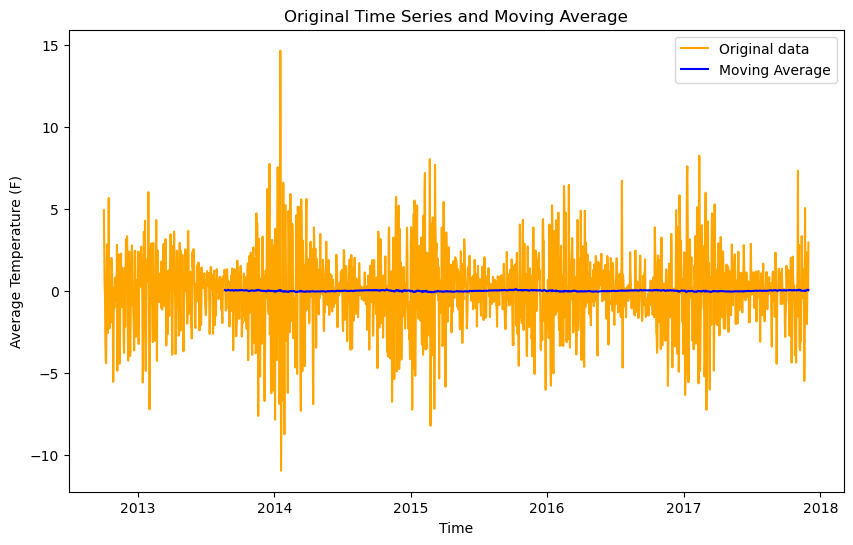

Augmented Dickey-Fuller test:
Test Statistic                -1.221944e+01
p-value                        1.116006e-22
#Lags Used                     1.600000e+01
Number of Observations Used    1.869000e+03
Critical Value (1%)           -3.433854e+00
Critical Value (5%)           -2.863088e+00
Critical Value (10%)          -2.567594e+00
dtype: float64
ADF Statistic: -12.219440265553777
p-value: 1.1160061884932118e-22
Critical Values:
	1%: -3.4338536404563853
	5%: -2.863087660163165
	10%: -2.5675939181074106
The data is stationary (reject the null hypothesis of non-stationarity).


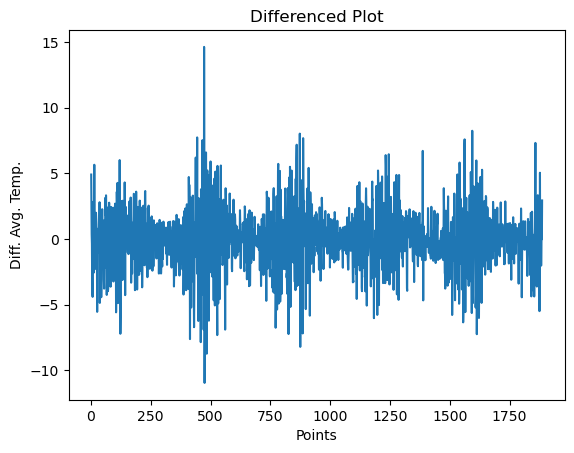

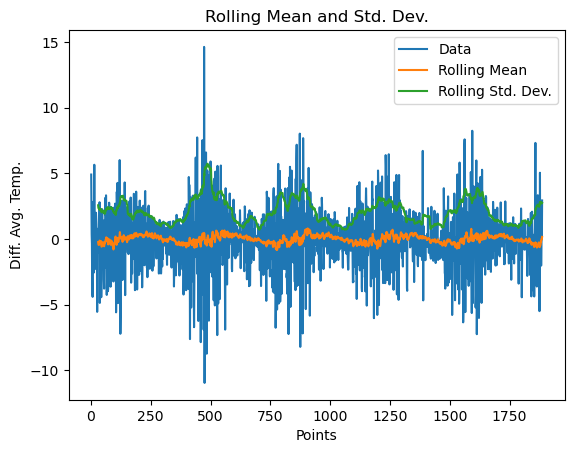

In [13]:
# Perform differencing on 'USAvgTemp' column
davg_df['USAvgTempDiff'] = davg_df['USAvgTemp'].diff()

# Remove the first row since it will have NaN value after differencing
davg_df = davg_df.dropna()

from statsmodels.tsa.stattools import adfuller

def stationary_ts_check1(ts):
    #Compute moving average
    mov_avg = ts.rolling(window=325).mean()
    
    #plot original and moving average/rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(ts, color='orange', label='Original data')
    plt.plot(mov_avg, color='blue', label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Average Temperature (F)')
    plt.title('Original Time Series and Moving Average')
    plt.legend()
    plt.show()
    
    #Augmented Dickey-Fuller test
    print('Augmented Dickey-Fuller test:')
    adf_output = adfuller(ts)
    df_result = pd.Series(adf_output[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_output[4].items():
        df_result['Critical Value (%s)' % key] = value
    print(df_result)

stationary_ts_check1(davg_df.USAvgTempDiff)
    
# Plot the differenced data
fig = plt.figure(2)
ax2 = fig.add_subplot(111)
ax2.set_xlabel('Points')
ax2.set_ylabel('Diff. Avg. Temp.')
ax2.set_title('Differenced Plot')
ax2.plot('Points', 'USAvgTempDiff', data=davg_df);

# Summary Statistics
rolling_mean = davg_df['USAvgTempDiff'].rolling(window=30).mean()
rolling_std = davg_df['USAvgTempDiff'].rolling(window=30).std()

fig = plt.figure(4)
ax4 = fig.add_subplot(111)
ax4.set_xlabel('Points')
ax4.set_ylabel('Diff. Avg. Temp.')
ax4.set_title('Rolling Mean and Std. Dev.')
ax4.plot('Points', 'USAvgTempDiff', data=davg_df, label='Data')
ax4.plot(davg_df['Points'], rolling_mean, label='Rolling Mean')
ax4.plot(davg_df['Points'], rolling_std, label='Rolling Std. Dev.')
ax4.legend();

# Augmented Dickey-Fuller Test
result = adfuller(davg_df['USAvgTempDiff'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis of non-stationarity).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis of non-stationarity).")

In [14]:
davg_df.USAvgTempDiff.rolling(center=False,window=325).mean()

DATE
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-06         NaN
                ...   
2017-11-26    0.047799
2017-11-27    0.063170
2017-11-28    0.075354
2017-11-29    0.069475
2017-11-30    0.056936
Freq: D, Name: USAvgTempDiff, Length: 1886, dtype: float64

In [15]:
from statsmodels.tsa.arima.model import ARIMA

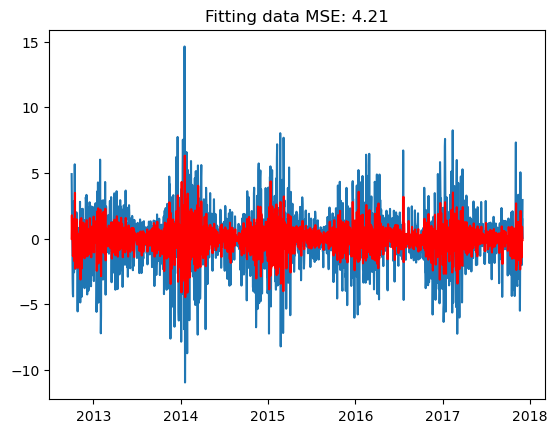

In [16]:
model = ARIMA(davg_df.USAvgTempDiff, order=(1,0,1))  
results = model.fit()  
plt.plot(davg_df.USAvgTempDiff)
plt.plot(results.fittedvalues, color='red')
plt.title('Fitting data MSE: %.2f'% (((results.fittedvalues-davg_df.USAvgTempDiff)**2).mean()))
plt.show()

In [17]:
from pandas import Timestamp

#test future predictions
predictions = results.predict(start=davg_df.index[0], end='10/01/2025')

#test historical data predictions
predictions = results.predict(start=davg_df.index[0], end=davg_df.index[-1])

In [18]:
#predictions

In [19]:
actuals = davg_df['10/02/2012':'10/01/2017']['USAvgTempDiff'][0:1887]

In [20]:
print("Actuals length:", len(actuals))
print("Predictions length:", len(predictions))


Actuals length: 1826
Predictions length: 1886


In [21]:
# Assuming your 'actuals' data starts from the first date in davg_df and ends on the last date in davg_df
actuals = davg_df['USAvgTempDiff'].values  # Get the values of the 'USAvgTempDiff' column

In [22]:
#Mean Absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:1887],predictions)
print(f'MAE:{mae}')

MAE:1.4741831464800228


In [23]:
davg_df.isnull().any(axis=0)

USAvgTemp        False
Points           False
USAvgTempDiff    False
dtype: bool

In [24]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(actuals[0:1887], predictions)

print(f'MSE: {mse}')

MSE: 4.208147860075229


In [25]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(actuals[0:1887], predictions)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 2.0513770643339146


In [26]:
#to check accuracy of our ARIMA model, keeping actual values aside

actuals = davg_df['10/01/2012':'10/01/2017']['USAvgTempDiff'][0:1887]

In [27]:
# Model Tuning

import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

# parameter ranges
p = range(0, 4)
d = 0 #ARMA model
q = range(0, 4)

# all possible combinations of p and q
pq = itertools.product(p, q)

best_aic = float('inf') 
best_order = None

for order in pq:
    try:
        model = ARIMA(davg_df['USAvgTempDiff'], order=(*order, d))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARMA model: ARMA{best_order} - AIC: {best_aic:.2f}')

ARMA(0, 0) - AIC: 8457.96
ARMA(0, 1) - AIC: 9057.85
ARMA(0, 2) - AIC: 10538.02
ARMA(0, 3) - AIC: 12409.74
ARMA(1, 0) - AIC: 8270.18
ARMA(1, 1) - AIC: 9041.02
ARMA(1, 2) - AIC: 10286.69
ARMA(1, 3) - AIC: 11827.89
ARMA(2, 0) - AIC: 7987.60
ARMA(2, 1) - AIC: 8651.53
ARMA(2, 2) - AIC: 9751.10
ARMA(2, 3) - AIC: 11143.05
ARMA(3, 0) - AIC: 7989.58
ARMA(3, 1) - AIC: 8577.17
ARMA(3, 2) - AIC: 9505.42
ARMA(3, 3) - AIC: 10691.99
Best ARMA model: ARMA(2, 0) - AIC: 7987.60


In [28]:
#newmodel = ARIMA(davg_df['USAvgTemp'], order =(3,0,0)) 
#order: (p,d,q) = autoregressive (p), differencing (d), moving average (q) 

#using results from AIC test model
#predictions = results.predict(start = '10/01/2012',end = '10/01/2017')

#print(davg_df.index[0])
#print(davg_df.index[-1])

predictions = results.predict(start=davg_df.index[0], end=davg_df.index[-1])
predictions.head(20)

DATE
2012-10-02     0.000000
2012-10-03     9.827939
2012-10-04    -1.828685
2012-10-05    -1.641626
2012-10-06    -0.261467
2012-10-07    -5.657472
2012-10-08    -4.959358
2012-10-09    -4.678298
2012-10-10     3.393356
2012-10-11     7.708056
2012-10-12     5.356144
2012-10-13    -6.540118
2012-10-14     1.573491
2012-10-15    -4.868953
2012-10-16    12.468968
2012-10-17    -2.745644
2012-10-18    -4.915575
2012-10-19     1.628532
2012-10-20    -5.367017
2012-10-21     2.572443
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
predictions[933:953]

DATE
2015-04-23   -0.623570
2015-04-24   -0.745644
2015-04-25    2.027562
2015-04-26    3.297717
2015-04-27   -0.407562
2015-04-28   -0.100980
2015-04-29   -1.666466
2015-04-30    2.432193
2015-05-01    3.310370
2015-05-02    0.529648
2015-05-03    3.042148
2015-05-04    0.582645
2015-05-05    1.370016
2015-05-06   -2.196003
2015-05-07   -2.312609
2015-05-08    2.756401
2015-05-09    0.147566
2015-05-10   -1.036991
2015-05-11    2.873704
2015-05-12   -2.144129
Freq: D, Name: predicted_mean, dtype: float64

In [30]:
predictions.tail(20)

DATE
2017-11-11    -1.526773
2017-11-12     4.536192
2017-11-13     6.112671
2017-11-14     0.947864
2017-11-15     0.497548
2017-11-16    -1.442151
2017-11-17    -3.216243
2017-11-18     3.596029
2017-11-19    -0.208981
2017-11-20   -10.657073
2017-11-21     0.400655
2017-11-22     9.665535
2017-11-23    -4.213753
2017-11-24     2.868851
2017-11-25     1.337602
2017-11-26     0.017907
2017-11-27    -2.139999
2017-11-28     1.223016
2017-11-29     0.461275
2017-11-30    -0.658816
Freq: D, Name: predicted_mean, dtype: float64

In [31]:
#print(davg_df.index.min())
#print(davg_df.index.max())

print("Actuals length:", len(actuals))
print("Predictions length:", len(predictions))

start_date = pd.Timestamp('2012-10-02')
end_date = pd.Timestamp('2017-10-01')
predictions = results.predict(start=start_date, end=end_date)

mae = mean_absolute_error(actuals[0:1887],predictions)
print(f'MAE:{mae}')

Actuals length: 1826
Predictions length: 1886
MAE:2.9573986186819665


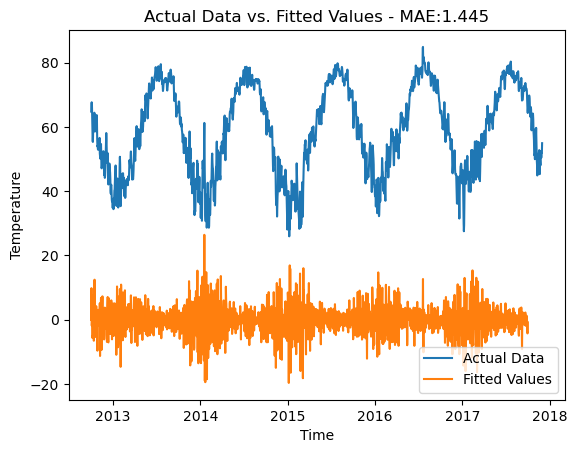

In [32]:
# Plotting the actual data and fitted values
plt.plot(davg_df['USAvgTemp'], label='Actual Data')
plt.plot(predictions, label='Fitted Values')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual Data vs. Fitted Values - MAE:1.445')
plt.legend()
plt.show()

In [33]:
# Model Tuning

p = q = range(0, 4)
d = range(0, 2)
pqd = itertools.product(p, d, q)

best_aic = np.inf
best_order = None

best_mse = np.inf
best_model = None

for param in pqd:
    try:
        model = ARIMA(davg_df['USAvgTempDiff'], order=param)
        results = model.fit()
        mse = ((results.fittedvalues - davg_df['USAvgTempDiff']) ** 2).mean()
        if mse < best_mse:
            best_mse = mse
            best_order = param
            best_model = results
        print('ARIMA{} - MSE:{}'.format(param, mse))
    except Exception as e:
        print(f"Exception occurred for ARIMA{param}: {e}")
        continue

ARIMA(0, 0, 0) - MSE:5.178972619713447
ARIMA(0, 0, 1) - MSE:4.235537586754076
ARIMA(0, 0, 2) - MSE:4.176126437164693
ARIMA(0, 0, 3) - MSE:3.9511218823838723
ARIMA(0, 1, 0) - MSE:7.153108079581328
ARIMA(0, 1, 1) - MSE:5.218466666638562
ARIMA(0, 1, 2) - MSE:4.265714415727682
ARIMA(0, 1, 3) - MSE:4.208901678794186
ARIMA(1, 0, 0) - MSE:4.684155924457069
ARIMA(1, 0, 1) - MSE:4.208147860075229
ARIMA(1, 0, 2) - MSE:3.9353013328779243
ARIMA(1, 0, 3) - MSE:3.8908443685224507
ARIMA(1, 1, 0) - MSE:7.0821289564017516
ARIMA(1, 1, 1) - MSE:4.716415472760696
ARIMA(1, 1, 2) - MSE:4.239403297773058
ARIMA(1, 1, 3) - MSE:4.263217357749577
ARIMA(2, 0, 0) - MSE:4.029342302144678
ARIMA(2, 0, 1) - MSE:4.02915478015165
ARIMA(2, 0, 2) - MSE:3.8931273119840024
ARIMA(2, 0, 3) - MSE:3.8908367631467478
ARIMA(2, 1, 0) - MSE:5.756225497071171
ARIMA(2, 1, 1) - MSE:4.061645969043365
ARIMA(2, 1, 2) - MSE:4.061403978923604
ARIMA(2, 1, 3) - MSE:3.8723973919507304
ARIMA(3, 0, 0) - MSE:4.029294576561637
ARIMA(3, 0, 1) - MS

Best ARIMA Order: (2, 1, 3)
Best MSE: 3.8723973919507304


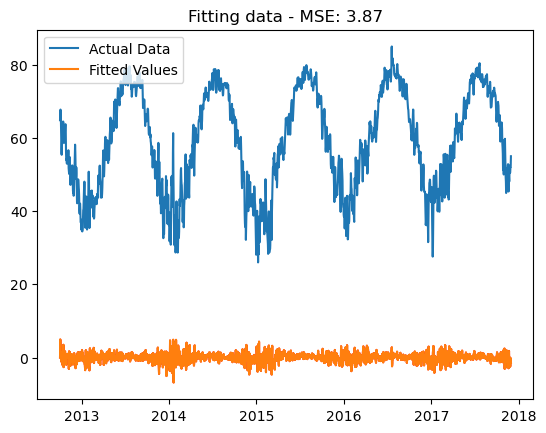

In [34]:
if best_model is not None:
    print('Best ARIMA Order:', best_order)
    print('Best MSE:', best_mse)

    plt.plot(davg_df['USAvgTemp'], label='Actual Data')
    plt.plot(best_model.fittedvalues, color='red')
    plt.plot(best_model.fittedvalues, label='Fitted Values')
    plt.title('Fitting data - MSE: %.2f' % best_mse)
    plt.legend()
    plt.show()
else:
    print('No best model found. Adjust your parameter range or check for errors in the data.')

In [35]:
davg_df.isnull()

,USAvgTemp,Points,USAvgTempDiff
DATE,,,
2012-10-02,False,False,False
2012-10-03,False,False,False
2012-10-04,False,False,False
2012-10-05,False,False,False
2012-10-06,False,False,False
...,...,...,...
2017-11-26,False,False,False
2017-11-27,False,False,False
2017-11-28,False,False,False


In [36]:
davg_df.isnull().sum()

USAvgTemp        0
Points           0
USAvgTempDiff    0
dtype: int64

In [37]:
davg_df.isnull().any(axis=0)

USAvgTemp        False
Points           False
USAvgTempDiff    False
dtype: bool

In [38]:
#using results from MSE test model
predictions = results.predict(start = '10/02/2012',end = '10/01/2025')
predictions.head(20)

2012-10-02    0.000000
2012-10-03    4.913949
2012-10-04    2.798965
2012-10-05    1.556615
2012-10-06    1.168088
2012-10-07   -0.598920
2012-10-08   -0.829527
2012-10-09   -0.926626
2012-10-10    1.408404
2012-10-11    1.659812
2012-10-12    0.892150
2012-10-13   -2.415463
2012-10-14    1.079660
2012-10-15   -1.517178
2012-10-16    3.241979
2012-10-17   -2.896918
2012-10-18   -0.405381
2012-10-19   -0.364175
2012-10-20   -0.133356
2012-10-21   -0.397993
Freq: D, Name: predicted_mean, dtype: float64

In [39]:
predictions[933:953]

2015-04-23    0.204211
2015-04-24    0.226900
2015-04-25    0.591979
2015-04-26    1.220067
2015-04-27   -0.151871
2015-04-28   -0.046294
2015-04-29   -0.307248
2015-04-30    0.874880
2015-05-01    0.074086
2015-05-02   -0.414916
2015-05-03    0.064456
2015-05-04   -0.360145
2015-05-05   -0.483149
2015-05-06   -1.404830
2015-05-07   -0.628126
2015-05-08    0.361597
2015-05-09   -0.395607
2015-05-10   -0.693173
2015-05-11    0.619153
2015-05-12   -0.512672
Freq: D, Name: predicted_mean, dtype: float64

In [40]:
predictions[1888:4749]

2017-12-03   -0.945932
2017-12-04   -0.682586
2017-12-05   -0.143864
2017-12-06    0.053192
2017-12-07    0.143008
                ...   
2025-09-27   -0.029441
2025-09-28   -0.029441
2025-09-29   -0.029441
2025-09-30   -0.029441
2025-10-01   -0.029441
Freq: D, Name: predicted_mean, Length: 2860, dtype: float64

In [41]:
predictions.tail(20)

2025-09-12   -0.029441
2025-09-13   -0.029441
2025-09-14   -0.029441
2025-09-15   -0.029441
2025-09-16   -0.029441
2025-09-17   -0.029441
2025-09-18   -0.029441
2025-09-19   -0.029441
2025-09-20   -0.029441
2025-09-21   -0.029441
2025-09-22   -0.029441
2025-09-23   -0.029441
2025-09-24   -0.029441
2025-09-25   -0.029441
2025-09-26   -0.029441
2025-09-27   -0.029441
2025-09-28   -0.029441
2025-09-29   -0.029441
2025-09-30   -0.029441
2025-10-01   -0.029441
Freq: D, Name: predicted_mean, dtype: float64

In [42]:
forecast = results.forecast(steps=365)
forecast[340:365]

2018-11-06   -0.029441
2018-11-07   -0.029441
2018-11-08   -0.029441
2018-11-09   -0.029441
2018-11-10   -0.029441
2018-11-11   -0.029441
2018-11-12   -0.029441
2018-11-13   -0.029441
2018-11-14   -0.029441
2018-11-15   -0.029441
2018-11-16   -0.029441
2018-11-17   -0.029441
2018-11-18   -0.029441
2018-11-19   -0.029441
2018-11-20   -0.029441
2018-11-21   -0.029441
2018-11-22   -0.029441
2018-11-23   -0.029441
2018-11-24   -0.029441
2018-11-25   -0.029441
2018-11-26   -0.029441
2018-11-27   -0.029441
2018-11-28   -0.029441
2018-11-29   -0.029441
2018-11-30   -0.029441
Freq: D, Name: predicted_mean, dtype: float64